# 2019.09.13. 데이터 전처리

- 나이

In [2]:
import pandas as pd
sample = pd.read_excel('sample.xlsx'); sample.head()

,종,나이,성별,무게,접수일,중성화 유무,접수장소
0,말티즈,2014,F,2.3,20181231,N,광주광역시 동구
1,라브라도 리트리버,2017,M,22.18,20181231,N,인천광역시 강화군
2,믹스견,2019,F,0.92,20181231,N,경상북도 상주시
3,믹스견,2019,F,0.87,20181231,N,경상북도 상주시
4,믹스견,2017,F,4.3,20181231,N,경상북도 상주시


In [3]:
sample.head()

,종,나이,성별,무게,접수일,중성화 유무,접수장소
0,말티즈,2014,F,2.3,20181231,N,광주광역시 동구
1,라브라도 리트리버,2017,M,22.18,20181231,N,인천광역시 강화군
2,믹스견,2019,F,0.92,20181231,N,경상북도 상주시
3,믹스견,2019,F,0.87,20181231,N,경상북도 상주시
4,믹스견,2017,F,4.3,20181231,N,경상북도 상주시


In [4]:
# 무게 제외(전처리 불가능할 정도로 기존 데이터 체계 엉망)
del sample['무게']; sample.head()

,종,나이,성별,접수일,중성화 유무,접수장소
0,말티즈,2014,F,20181231,N,광주광역시 동구
1,라브라도 리트리버,2017,M,20181231,N,인천광역시 강화군
2,믹스견,2019,F,20181231,N,경상북도 상주시
3,믹스견,2019,F,20181231,N,경상북도 상주시
4,믹스견,2017,F,20181231,N,경상북도 상주시


In [44]:
sample.info() # 접수일 빼고 다 문자열.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163437 entries, 0 to 163436
Data columns (total 6 columns):
종         163436 non-null object
나이        163437 non-null object
성별        163437 non-null object
접수일       163437 non-null int64
중성화 유무    163437 non-null object
접수장소      163437 non-null object
dtypes: int64(1), object(5)
memory usage: 8.7+ MB


## 나이

In [5]:
from datetime import datetime
sample['접수일'] = pd.to_datetime(sample['접수일'], format = '%Y%m%d')

In [ ]:
# 2000 - 나이

In [ ]:
# 일단은 나이의 unique를 한 번 보자

In [6]:
sample['나이'].value_counts()

2017     34578
2018     31370
2016     24433
2015     23462
2014     15266
2013     10225
2012      7566
2011      3893
2010      3521
2008      2394
2007      2391
2009      2120
2005       606
2006       592
2003       330
2004       281
2002       240
2001        57
2019        57
2000        15
             8
1999         7
1998         4
1997         2
4            2
3            2
5            2
1988         2
-            1
`            1
2015         1
0            1
1993         1
208          1
1992         1
1            1
10           1
20118        1
2            1
Name: 나이, dtype: int64

In [7]:
# ' ', '`', '-', 0', '1', '2', '3', '4', '5', '10', 20118', '208' 확인

In [8]:
# 나이가 숫자인 아이들은 20(숫자)년생인가 (숫자)살인가...
# 나이가 (숫자)(년생)인 걸 보니 20(숫자)년생이 맞는 것 같은데
sample[sample['나이'].isin([' ', '`', '-', '0', '1', '2', '3', '4', '5', '10', '20118', '208'])]

,종,나이,성별,접수일,중성화 유무,접수장소
100,믹스견,,Q,2018-12-31,U,부산광역시 남구
4477,시츄,,F,2018-12-10,U,부산광역시 남구
6245,믹스견,208,M,2018-12-03,N,경상북도 김천시
6732,믹스견,,Q,2018-11-30,U,부산광역시 남구
7008,스피츠,3,F,2018-11-29,U,대전광역시 중구
7299,골든 리트리버,,M,2018-11-28,N,부산광역시 남구
9535,믹스견,,M,2018-11-19,U,부산광역시 남구
27356,믹스견,,M,2018-09-12,U,부산광역시 남구
29469,미디엄 푸들,,F,2018-09-05,U,부산광역시 남구
47866,푸들,5,M,2018-06-29,N,부산광역시 서구


In [9]:
len(sample[sample['나이'].isin([' ', '`', '-', '0', '1', '2', '3', '4', '5', '10', '20118', '208'])])

22

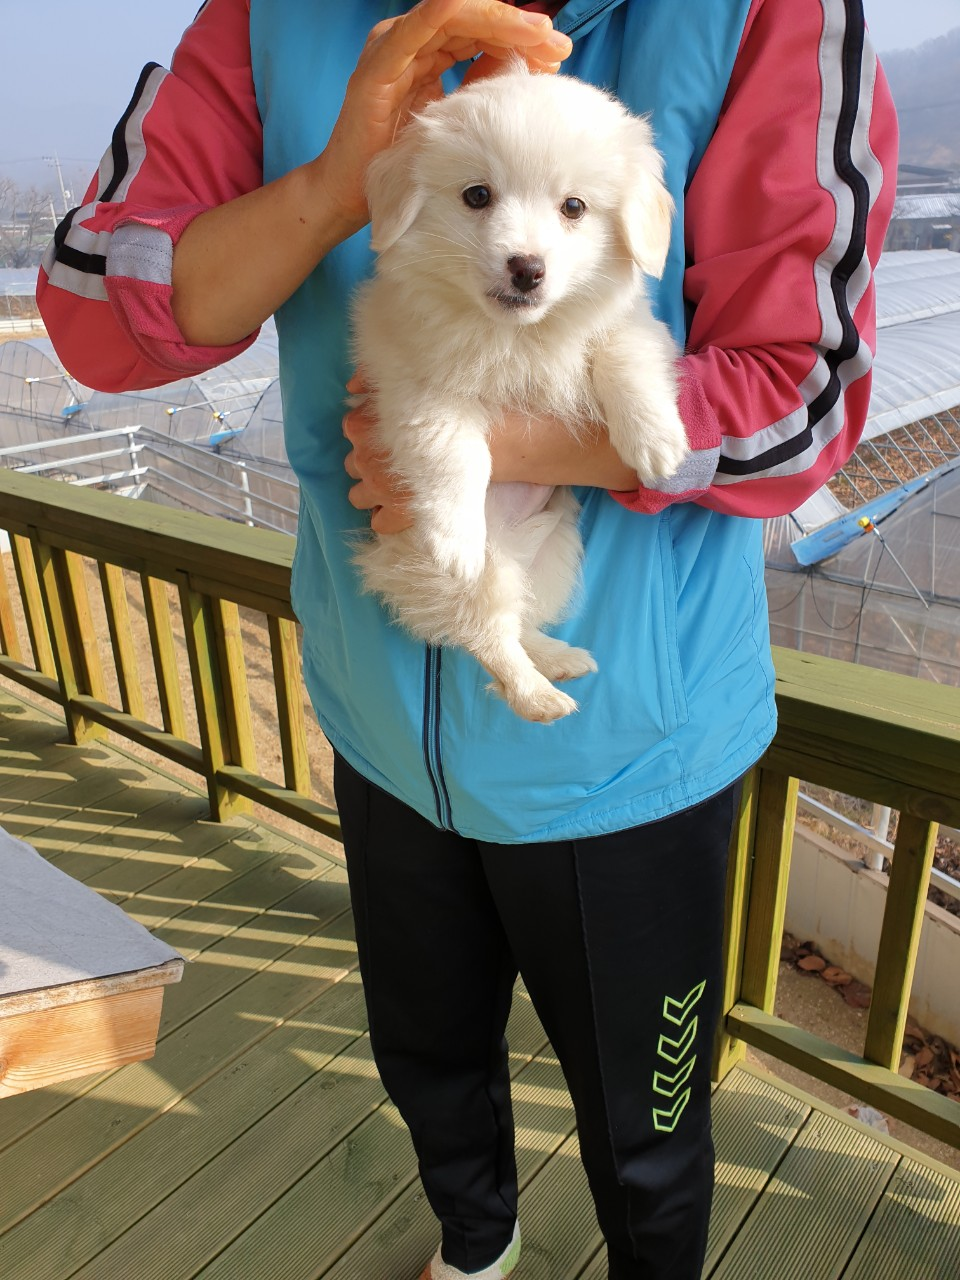

In [10]:
# 208은 2018년생인 거 확인
http://animal.go.kr/portal_rnl/abandonment/public_view.jsp?desertion_no=447506201800309&s_date=2018-12-03&e_date=2018-12-04&s_upr_cd=6470000&s_org_cd=5060000&s_up_kind_cd=417000&s_kind_cd=&pagecnt=1&s_title=&s_sex_cd=&s_call_name=&s_shelter_cd=&s_state=&s_state_hidden=

SyntaxError: invalid syntax (<ipython-input-10-08e05657f319>, line 2)

In [11]:
sample['나이'][sample['나이'].values =='208'] = 2018

C:\Users\dxodn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
sample.iloc[6245]

종                         믹스견
나이                       2018
성별                          M
접수일       2018-12-03 00:00:00
중성화 유무                      N
접수장소                 경상북도 김천시
Name: 6245, dtype: object

In [13]:
# 20118인 친구 값 sample.loc[50300, '나이'] = 2018

In [14]:
sample.loc[50300, '나이']

'20118'

In [15]:
len(sample[sample['나이'].isin([' ', '`', '-', '0', '1', '2', '3', '4', '5', '10'])])

20

In [16]:
# 이상값 포함하는 row 제거
len(sample['종'])
for i in sample[sample['나이'].isin([' ', '`', '-', '0', '1', '2', '3', '4', '5', '10', '20118', '208'])].index:
    sample.drop(i, axis = 0, inplace = True)
len(sample['종'])

163416

In [17]:
sample['나이'].values

array(['2014', '2017', '2019', ..., '2013', '2014', '2012'], dtype=object)

In [18]:
sample['나이'].value_counts() # 하단에 2018 2015는 뭘까?

2017     34578
2018     31370
2016     24433
2015     23462
2014     15266
2013     10225
2012      7566
2011      3893
2010      3521
2008      2394
2007      2391
2009      2120
2005       606
2006       592
2003       330
2004       281
2002       240
2001        57
2019        57
2000        15
1999         7
1998         4
1997         2
1988         2
1993         1
1992         1
2018         1
2015         1
Name: 나이, dtype: int64

In [19]:
sample['나이'].value_counts().index # 끝에 2018, 2015를 보자

Index([ '2017',  '2018',  '2016',  '2015',  '2014',  '2013',  '2012',  '2011',
        '2010',  '2008',  '2007',  '2009',  '2005',  '2006',  '2003',  '2004',
        '2002',  '2001',  '2019',  '2000',  '1999',  '1998',  '1997',  '1988',
        '1993',  '1992',    2018, '2015 '],
      dtype='object')

In [20]:
# 2018
sample['나이'][sample['나이'].values == 2018]

6245    2018
Name: 나이, dtype: object

In [22]:
# '2015 '
sample['나이'][sample['나이'].values == '2015 ']

143408    2015 
Name: 나이, dtype: object

In [23]:
for i in sample['나이'][sample['나이'].values == '2015 '].index :
    sample['나이'][i] = 2015
    print(type(sample['나이'][sample['나이'].values == '2015 ']))

<class 'pandas.core.series.Series'>


C:\Users\dxodn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
sample['나이'] = sample['나이'].values.astype(int)

In [25]:
sample['나이'].value_counts() # 2019년은 뭘까?

2017    34578
2018    31371
2016    24433
2015    23463
2014    15266
2013    10225
2012     7566
2011     3893
2010     3521
2008     2394
2007     2391
2009     2120
2005      606
2006      592
2003      330
2004      281
2002      240
2001       57
2019       57
2000       15
1999        7
1998        4
1997        2
1988        2
1993        1
1992        1
Name: 나이, dtype: int64

In [26]:
sample[sample['나이'].isin(['2019'])]

,종,나이,성별,접수일,중성화 유무,접수장소
2,믹스견,2019,F,2018-12-31,N,경상북도 상주시
3,믹스견,2019,F,2018-12-31,N,경상북도 상주시
9,치와와,2019,M,2018-12-31,N,경상북도 안동시
13,믹스견,2019,M,2018-12-31,U,부산광역시 영도구
14,프렌치 불독,2019,M,2018-12-31,U,부산광역시 영도구
17,믹스견,2019,M,2018-12-31,N,제주특별자치도
18,믹스견,2019,F,2018-12-31,N,제주특별자치도
19,푸들,2019,M,2018-12-31,N,제주특별자치도
20,믹스견,2019,M,2018-12-31,N,제주특별자치도
21,믹스견,2019,M,2018-12-31,N,제주특별자치도


In [ ]:
2018년 12월 말에 접수된 어린 유기견들이 공고 도중 년수가 넘어갈 것을 생각해서 다 2019이다. 2018로 바꿔주자.

In [27]:
# 2019년 친구들 2018년으로 바꿔주기
for i in sample['나이'][sample['나이'].values == 2019].index :
    sample['나이'][i] = 2018

C:\Users\dxodn\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
sample['나이'].value_counts()

2017    34578
2018    31428
2016    24433
2015    23463
2014    15266
2013    10225
2012     7566
2011     3893
2010     3521
2008     2394
2007     2391
2009     2120
2005      606
2006      592
2003      330
2004      281
2002      240
2001       57
2000       15
1999        7
1998        4
1997        2
1988        2
1993        1
1992        1
Name: 나이, dtype: int64

In [39]:
a = [i for i in sample['나이']]
year = [i.year for i in sample['접수일']]

In [61]:
a = [abs(i - 2019) for i in sample['나이']]
year = [i.year for i in sample['접수일']]

In [62]:
sample['a'] = a
sample['a'].value_counts()

2     34578
1     31428
3     24433
4     23463
5     15266
6     10225
7      7566
8      3893
9      3521
11     2394
12     2391
10     2120
14      606
13      592
16      330
15      281
17      240
18       57
19       15
20        7
21        4
22        2
31        2
27        1
26        1
Name: a, dtype: int64

In [76]:
sample.head()

,종,나이,성별,접수일,중성화 유무,접수장소
0,말티즈,4,F,2018-12-31,N,광주광역시 동구
1,라브라도 리트리버,1,M,2018-12-31,N,인천광역시 강화군
2,믹스견,0,F,2018-12-31,N,경상북도 상주시
3,믹스견,0,F,2018-12-31,N,경상북도 상주시
4,믹스견,1,F,2018-12-31,N,경상북도 상주시


In [79]:
# 이상값 포함하는 row 제거
for i in sample[sample['나이'].isin([19, 20, 21, 22, 23,  24, 25, 26, 27, 28, 29])].index:
    sample.drop(i, axis = 0, inplace = True)
sample['나이'].value_counts()

0     51953
2     25200
1     24903
3     22017
5     10510
4     10073
6      4454
10     4190
7      3619
8      3404
12      858
9       820
15      466
13      430
11      263
14      155
16       44
17       34
18       12
Name: 나이, dtype: int64

In [80]:
sample.to_excel('age.xlsx')

In [471]:
sample.to_excel('종 분류해야 함.xlsx')

## 2019.09.14. 데이터 전처리
1. 종(엑셀로 대부분 진행)

In [2]:
import pandas as pd
sample = pd.read_excel('종 분류해야 함.xlsx')

In [5]:
sample.head()

,Unnamed: 0,종,나이,성별,접수일,중성화 유무,접수장소
0,0,말티즈,5,F,20181231,N,광주광역시 동구
1,1,라브라도 리트리버,2,M,20181231,N,인천광역시 강화군
2,2,믹스견,1,F,20181231,N,경상북도 상주시
3,3,믹스견,1,F,20181231,N,경상북도 상주시
4,4,믹스견,2,F,20181231,N,경상북도 상주시


In [6]:
del sample['Unnamed: 0']

In [7]:
sample.head()

,종,나이,성별,접수일,중성화 유무,접수장소
0,말티즈,5,F,20181231,N,광주광역시 동구
1,라브라도 리트리버,2,M,20181231,N,인천광역시 강화군
2,믹스견,1,F,20181231,N,경상북도 상주시
3,믹스견,1,F,20181231,N,경상북도 상주시
4,믹스견,2,F,20181231,N,경상북도 상주시


In [481]:
# 분류의 합
len(sample['종'].unique())

558

In [ ]:
### 나이와 무게를 전처리하고 나니 row는 1382개 줄었고, 종의 unique는 4개가 줄었다.

In [486]:
# 각 종별 갯수
for i in sample['종'].value_counts():
    print(i)

88117
14227
14111
7066
5045
3856
3268
2779
1814
1794
1584
1575
1367
1102
1033
958
881
714
654
620
460
455
419
392
388
354
342
312
293
285
261
233
222
221
216
193
184
183
159
153
150
140
107
103
99
98
95
80
76
67
67
62
59
59
57
56
54
54
54
53
50
50
47
46
45
44
44
41
39
38
29
29
28
28
27
27
26
25
25
25
24
24
23
23
22
22
22
20
20
20
19
19
18
17
17
16
16
16
15
15
15
15
15
14
14
13
13
12
11
11
11
11
10
10
10
9
9
9
8
8
8
8
8
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1

In [499]:
# 품종별 5개 이하인 품종의 수, 품종별 5개 이하인 품종의 갯수
count = 0
all_count = 0
for i in sample['종'].unique():
    if  (10 > len(sample['종'][sample['종'].values == i])) == True:
        print('{}'.format(i))
        count += 1
        all_count += len(sample['종'][sample['종'].values == i])
print(count, all_count)

케니스펜더
보르조이
세터
잡종견(믹스견)
벨기에 쉽독
푸들믹스견
잉글리쉬불독
벨지안 셰퍼드 독
블랙탄
웰시코기
리트리버믹스견
푸말
플랫 코티드 리트리버
댕견
울프독
벨기에 테뷰런
시바믹스
아이리쉬 울프 하운드
푸들믹스견 추정
로트바일러
미니어쳐 닥스훈트
아나톨리안 셰퍼드 도그(캉갈)
카이훗
스코티쉬 테리어 추정
잉글리쉬 스프링거 스파니엘
티베탄 마스티프
진도믹스 추정
발발이
풍산개?
미상
하운드 믹스
스테포드셔불테리어
미니핀혼합
포메믹스
피레니안 마운틴 독
불개
슈나믹스
래빗 닥스훈드
요크믹스
아메리칸 아키다
노리치 테리어
케리 블루 테리어
아펜핀셔
리트리버믹스
요키믹스
발바리새끼
진돗개 블랙탄
코카 푸
차이니즈 크레스티드 독
잉글리쉬불테리어
하운드 계열 잡종견
새끼발바리
말티즈 믹스
포메 또는 스피츠믹스로 추정
아이리쉬 세터
라사 압소
허스키 믹스
푸들 믹스
와이어 폭스 테리어
킹찰스스파니엘
푸들믹스
 
도사견
스코티쉬 테리어
불독믹스
스무드 폭스 테리어
페터데일테리어
에어델 테리어
비숑믹스
러프콜리
뉴펀들랜드
풀리
잉글리쉬 불독
진도혼합
치와와혼종
보더콜리 믹스
사모예드혼종
비글믹스
시바 믹스
라브라도 믹스
시추말티혼종
빠삐요
와이마라너
말티푸
빠삐용믹스
샤파이어
오스트랄리안 셰퍼드 독
포메라니안 믹스추정
핏불믹스
시베리안라이카
진도 믹스
폼피츠추정
닥스훈트 믹스 추정
차우차우 믹스견
품종확인불가
오브차카 믹스추정
비글믹스추정
롱헤어치와와
바센지
카레리안 베어독
비즐라
치와와믹스추정
마스티프
웰시코기믹스
셰퍼드 믹스 추정
아메리칸 불독
벨기에 말리노이즈
진도견믹스
프렌치 브리타니
진돗개 호피
믹스포메
발바리 
포인타
코카믹스
말티즈푸들믹스
잉글리쉬 쉽독
꼬똥 드 툴레야
흰세퍼드 추정
러브콜리
불독 혼합
셰퍼믹스
푸들 믹스견
장모치와와
포메+스피츠 믹스
말티즈 믹스견
말티츄
스코티시 디어하운드
염소
잉글리쉬 코카스페니얼 믹스
프레사까나리오
말티믹스
mixed
블리 믹스
웰시코기 믹스
아이리쉬울프하운드추정
치와와 혼합
차우믹스
저먼 포인터
말티즈 믹스  추정


In [479]:
# 품종별 1000개 이상 카테고리, 합, 카테고리 수들의 합
count = 0
all_count = 0
for i in sample['종'].unique():
    if  (1000 < len(sample['종'][sample['종'].values == i])) == True:
        print('{}'.format(i))
        count += 1
        all_count += len(sample['종'][sample['종'].values == i])

print(count, all_count)

말티즈
라브라도 리트리버
믹스견
치와와
스피츠
푸들
골든 리트리버
포메라니안
진도견
시츄
요크셔 테리어
웰시 코기 펨브로크
닥스훈트
미니어쳐 핀셔
코카 스파니엘
15 148738


In [509]:
443/558

0.7939068100358423

In [501]:
len(sample['종'])

162055

In [500]:
1000개 이상 개체 수를 가진 종들이 전체의 97% 개체 수를 차지함
543/558

0.9731182795698925

In [544]:
# 일단 믹스, mix 이런 것들이 들어간 것들을 다 찾아서 믹스견으로 변환해야겠음
sample['종'].value_counts()

믹스견             88117
푸들              14227
말티즈             14111
진도견              7066
시츄               5045
포메라니안            3856
요크셔 테리어          3268
스피츠              2779
골든 리트리버          1814
치와와              1794
코카 스파니엘          1584
닥스훈트             1575
라브라도 리트리버        1367
미니어쳐 핀셔          1102
웰시 코기 펨브로크       1033
슈나우져              958
시베리안 허스키          881
비글                714
보스턴 테리어           654
프렌치 불독            620
비숑 프리제            460
페키니즈              455
셰퍼드               419
보더 콜리             392
사모예드              388
불독                354
발바리               342
포인터               312
퍼그                293
말라뮤트              285
                ...  
말라뮤트(믹스)            1
케인크루소               1
스피츠 또는 믹스           1
러브콜리                1
제페니즈 친              1
흰검색                 1
프레사까나리오             1
티벳티안 마스티프           1
블랙 테리어              1
진도 또는 대형견 믹스        1
벨기에 테뷰런             1
진도스피츠혼합             1
진돗개믹스견              1
진도 또는 진도믹스          1
말티스 믹스견 추정

In [506]:
#믹스, 혼합, 잡종, mix을 모두 믹스견으로
# 돌리기 전 유니크 557
for i in sample['종'].unique():
    print(i)

말티즈
라브라도 리트리버
믹스견
케니스펜더
도사
치와와
프렌치 불독
스피츠
푸들
골든 리트리버
포메라니안
포인터
진도견
비글
시베리안 허스키
시츄
보스턴 테리어
요크셔 테리어
웰시 코기 펨브로크
풍산견
셰퍼드
미니어쳐 푸들
닥스훈트
잉글리쉬 세터
불독
미니어쳐 핀셔
벨기에 그로넨달
보더 콜리
도베르만
시바
슈나우져
알라스칸 말라뮤트
보르조이
그레이 하운드
사모예드
삽살개
올드 잉글리쉬 쉽독
마리노이즈
페키니즈
코카 스파니엘
아프간 하운드
비숑 프리제
핏불테리어
아메리칸 코카 스파니엘
달마시안
퍼그
이탈리안 그레이 하운드
아메리칸불리
세터
버니즈 마운틴 독
말라뮤트
차우차우
그레이트 피레니즈
라이카
사냥개
토이 푸들
동경견
케인 코르소
브리타니 스파니엘
베들링턴 테리어
미텔 스피츠
기타
오브차카
잡종견(믹스견)
벨기에 쉽독
롯트와일러
푸들믹스견
잉글리쉬불독
그레이트 덴
콜리
잉글리쉬쉽독
스탠다드 푸들
샤페이
벨지안 셰퍼드 독
블랙탄
캐벌리어 킹 찰스 스파니엘
빠삐용
웰시코기
믹스견(잡종견)
발바리
올드 잉글리쉬 불독
리트리버믹스견
혼합
푸말
잉글리쉬 코카 스파니엘
셔틀랜드 쉽독
플랫 코티드 리트리버
허스키
잉글리쉬 포인터
댕견
울프독
벨기에 테뷰런
시바믹스
아키다
아이리쉬 울프 하운드
푸들믹스견 추정
로트바일러
미니어쳐 닥스훈트
아나톨리안 셰퍼드 도그(캉갈)
재패니즈 스피츠
카이훗
스코티쉬 테리어 추정
폼피츠
잉글리쉬 스프링거 스파니엘
미디엄 푸들
미니핀
폭스테리어
화이트테리어
미니어쳐 슈나우저
티베탄 마스티프
진도믹스 추정
휘펫
발발이
풍산개?
잡종
미상
잭 러셀 테리어
하운드 믹스
제페니즈칭
불 테리어
스테포드셔불테리어
저먼 셰퍼드 독
미니핀혼합
포메믹스
믹스
아메리칸 핏불 테리어
피레니안 마운틴 독
불개
슈나믹스
래빗 닥스훈드
요크믹스
아메리칸 아키다
잡종견
바셋 하운드
노리치 테리어
케리 블루 테리어
아펜핀셔
리트리버믹스
요키믹스
발바리새끼
진돗개 블랙탄
코카 푸
차이니즈 크레스티드 독
잉글리쉬불테리어
하운드 계열 잡종견
새끼발바리
말티즈 믹스
포메 또는

In [515]:
len(sample['종'])

162055

In [545]:
# 일단 종이 빈칸인 것들 6개 다 날리기
for i in sample[sample['종'].isin([' '])].index:
    sample.drop(i, axis = 0, inplace = True)
len(sample['종'])

162049

In [585]:
# nan 삭제
for i in sample['종'][sample['종'].isnull().values].index:
    sample.drop(i, axis = 0, inplace = True)
len(sample['종'])

162048

In [724]:
idx = sample['종'][sample['종'].values != '믹스견'].index

Int64Index([     0,      1,      5,      7,      9,     11,     12,     14,
                16,     19,
            ...
            162039, 162042, 162043, 162046, 162048, 162049, 162050, 162051,
            162053, 162054],
           dtype='int64', length=73931)

In [723]:
for i in sample['종'][sample['종'].values != '믹스견'][sample.loc[idx,'종'].str.contains('믹스|혼합|잡종|mix')].index:
 sample.loc[i, '종'] = '믹스견'
len(sample['종'].unique())

365

In [728]:
# 이제 무슨 종이 남았는지 확인하고 또 전처리하자
for i in sample['종'].unique():
    print(i)

말티즈
라브라도 리트리버
믹스견
케니스펜더
도사
치와와
프렌치 불독
스피츠
푸들
골든 리트리버
포메라니안
포인터
진도견
비글
시베리안 허스키
시츄
보스턴 테리어
요크셔 테리어
웰시 코기 펨브로크
풍산견
셰퍼드
미니어쳐 푸들
닥스훈트
잉글리쉬 세터
불독
미니어쳐 핀셔
벨기에 그로넨달
보더 콜리
도베르만
시바
슈나우져
알라스칸 말라뮤트
보르조이
그레이 하운드
사모예드
삽살개
올드 잉글리쉬 쉽독
마리노이즈
페키니즈
코카 스파니엘
아프간 하운드
비숑 프리제
핏불테리어
아메리칸 코카 스파니엘
달마시안
퍼그
이탈리안 그레이 하운드
아메리칸불리
세터
버니즈 마운틴 독
말라뮤트
차우차우
그레이트 피레니즈
라이카
사냥개
토이 푸들
동경견
케인 코르소
브리타니 스파니엘
베들링턴 테리어
미텔 스피츠
기타
오브차카
벨기에 쉽독
롯트와일러
잉글리쉬불독
그레이트 덴
콜리
잉글리쉬쉽독
스탠다드 푸들
샤페이
벨지안 셰퍼드 독
블랙탄
캐벌리어 킹 찰스 스파니엘
빠삐용
웰시코기
발바리
올드 잉글리쉬 불독
푸말
잉글리쉬 코카 스파니엘
셔틀랜드 쉽독
플랫 코티드 리트리버
허스키
잉글리쉬 포인터
댕견
울프독
벨기에 테뷰런
아키다
아이리쉬 울프 하운드
로트바일러
미니어쳐 닥스훈트
아나톨리안 셰퍼드 도그(캉갈)
재패니즈 스피츠
카이훗
스코티쉬 테리어 추정
폼피츠
잉글리쉬 스프링거 스파니엘
미디엄 푸들
미니핀
폭스테리어
화이트테리어
미니어쳐 슈나우저
티베탄 마스티프
휘펫
발발이
풍산개?
미상
잭 러셀 테리어
제페니즈칭
불 테리어
스테포드셔불테리어
저먼 셰퍼드 독
아메리칸 핏불 테리어
피레니안 마운틴 독
불개
래빗 닥스훈드
아메리칸 아키다
바셋 하운드
노리치 테리어
케리 블루 테리어
아펜핀셔
발바리새끼
진돗개 블랙탄
코카 푸
차이니즈 크레스티드 독
잉글리쉬불테리어
새끼발바리
아이리쉬 세터
라사 압소
와이어 폭스 테리어
킹찰스스파니엘
도사견
도고 아르젠티노
스코티쉬 테리어
스무드 폭스 테리어
페터데일테리어
에어델 테리어
러프콜리
뉴펀들랜드
복서
풀리
잉글리쉬 불독
치와와혼종
사모예드혼종
시추말티혼종
빠삐요

In [735]:
# 여기서부터 엑셀 수작업
# 수작업 기준(알 수 없음, 사냥견과 같은 분류가 안 되어 있거나 종의 분류가 아닌 종의 특성을 적어놓은 row들은 모두 삭제
# 띄어쓰기, 맞춤법 통합)
import pandas as pd
sample.to_excel('믹스견통합.xlsx')

In [737]:
# 위의 거 내보내서 2차적으로 한 번 더 검사
import pandas as pd
data = pd.read_excel('종분류완료.xlsx')

In [760]:
data['종'].value_counts()

믹스견                89183
푸들                 14393
말티즈                14113
진돗개                 7084
시츄                  5045
포메라니안               3856
요크셔 테리어             3268
스피츠                 2780
골든 리트리버             1814
치와와                 1795
코카 스파니엘             1652
닥스훈트                1585
래브라도 리트리버           1544
미니어쳐 핀셔             1130
웰시 코기               1035
슈나우저                 988
시베리안 허스키             903
비글                   714
보스턴 테리어              657
프렌치 불독               647
비숑 프리제               516
알래스칸 맬러뮤트            470
셰퍼드                  462
페키니즈                 455
보더 콜리                432
사모예드                 388
발바리                  358
불독                   354
포인터                  336
퍼그                   293
                   ...  
테리어                    1
레몬보더                   1
폭스하운드                  1
보스롱                    1
플레사카나리오                1
피네리즈                   1
에스키모                   1
도고 까니리오                1
골든듀드                   1


In [788]:
# 지금부터 파이썬으로 또 작업
import pandas as pd
data = pd.read_excel('종분류완료 1차 검수 후.xlsx')

In [789]:
data.head()

,종,나이,성별,무게,접수일,중성화 유무,접수장소
0,골든 리트리버,1,M,24,20181231,N,제주특별자치도
1,골든 리트리버,4,M,30,20181229,N,충청북도 청주시
2,골든 리트리버,4,F,20,20181229,U,경기도 시흥시
3,골든 리트리버,2,F,21,20181228,N,제주특별자치도
4,골든 리트리버,4,F,22,20181228,U,충청북도 충주시


In [ ]:
# 종 기타 마지막 다 삭제
for i in data[data['종'].isin(['기타'])].index:
    data.drop(i, axis = 0, inplace = True)

In [795]:
for i in data['종'].unique():
    print(i)

골든 리트리버
골든듀드
그레이 하운드
그레이트 덴
그레이트 피레니즈
꼬똥 드 툴레아 
노리치 테리어
노퍽 테리어
뉴펀들랜드
닥스훈트
달마시안
도고 까니리오
도고 아르헨티노
도베르만
도사
동경견
라사 압소
라이카
래브라도 리트리버
러프콜리
레몬보더
레이크랜드테리어
로트바일러
롯트와일러
마스티프
말리노이즈
말티즈
미니어쳐 핀셔
미디엄 푸들
미텔 스피츠
믹스견
바센지
바셋 하운드
발바리
버니즈 마운틴 독
베들링턴 테리어
벨기에 마리노이즈
벨기에 쉽독
보더 콜리
보르조이
보스롱
보스턴 테리어
복서
불 테리어
불개
불독
불리쿠타
브리타니
브리타니 스파니엘
블랙 리트리버
블랙 테리어
비글
비숑 프리제
비즐라
사모예드
삽살개
샤페이
세인트 버나드
세타
셔틀랜드 쉽독
셰퍼드
쉬즈
쉽독
슈나우저
스무드 폭스 테리어
스코티쉬 테리어
스코티시 디어하운드
스탠다드 푸들
스테포드셔불테리어
스피츠
시바견
시베리안 라이카
시베리안 허스키
시츄
시코쿠
아메리칸 불독
아메리칸 불리
아메리칸 아키다
아메리칸 에스키모
아이리쉬 세터
아이리쉬 울프 하운드
아키다
아펜핀셔
아프간 하운드
알래스칸 맬러뮤트
에스키모
에어델 테리어
오브차카
올드 잉글리쉬 불독
올드 잉글리쉬 쉽독
와이마라너
와이어 폭스 테리어
요크셔 테리어
울프독
웨스트 하이랜드 화이트테리어
웰시 코기
웰시 테리어
이탈리안 그레이 하운드
잉글리쉬 세터
잉글리쉬 스프링거 스파니엘
잉글리쉬 폭스 하운드
잉글리쉬불테리어
자이언트 슈나우져
장모치와와
장오
재패니스 친
재패니즈 스피츠
잭 러셀 테리어
진돗개
차우차우
차이니즈 크레스티드 독
치와와
카네코르소
카레리안 베어독
카이훗
캉갈
케니스펜더
케리 블루 테리어
코카 스파니엘
콜리
킹 찰스 스파니엘
테리어
토이 폭스 테리어
티베탄 마스티프
파라오하운드
파피용
퍼그
페키니즈
페터데일테리어
포메라니안
포인터
폭스 테리어
폭스하운드
폴리
폼피츠
푸들
풀리
풍산개
프레사까나리오
프렌치 불독
프렌치 브리타니
플랫 코티드 리트리버
플레사카나리오
플롯하운드
피네리즈
핏불 테리어
화이트 리트리버
화이트테리어

In [796]:
data.to_excel('data.xlsx')

# 데이터 전처리 끝